In [39]:
# Import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
#  Load the dataset
df = pd.read_csv('Cardio_DataSet.csv')

In [6]:
# Check the column names  
print(df.columns)

Index(['Product', 'Age', 'Gender', 'Education', 'MaritalStatus', 'Usage',
       'Fitness', 'Income', 'Miles'],
      dtype='object')


In [8]:
# Display the first few rows of the dataset
print(df.head(10))

  Product  Age  Gender  Education MaritalStatus  Usage  Fitness  Income  Miles
0   TM195   18    Male         14        Single      3        4   29562    112
1   TM195   19    Male         15        Single      2        3   31836     75
2   TM195   19  Female         14     Partnered      4        3   30699     66
3   TM195   19    Male         12        Single      3        3   32973     85
4   TM195   20    Male         13     Partnered      4        2   35247     47
5   TM195   20  Female         14     Partnered      3        3   32973     66
6   TM195   21  Female         14     Partnered      3        3   35247     75
7   TM195   21    Male         13        Single      3        3   32973     85
8   TM195   21    Male         15        Single      5        4   35247    141
9   TM195   21  Female         15     Partnered      2        3   37521     85


In [9]:
# Data types and null value information
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB
None


In [11]:
 # Statistical summary of numerical data
print(df.describe())

              Age   Education       Usage     Fitness         Income  \
count  180.000000  180.000000  180.000000  180.000000     180.000000   
mean    28.788889   15.572222    3.455556    3.311111   53719.577778   
std      6.943498    1.617055    1.084797    0.958869   16506.684226   
min     18.000000   12.000000    2.000000    1.000000   29562.000000   
25%     24.000000   14.000000    3.000000    3.000000   44058.750000   
50%     26.000000   16.000000    3.000000    3.000000   50596.500000   
75%     33.000000   16.000000    4.000000    4.000000   58668.000000   
max     50.000000   21.000000    7.000000    5.000000  104581.000000   

            Miles  
count  180.000000  
mean   103.194444  
std     51.863605  
min     21.000000  
25%     66.000000  
50%     94.000000  
75%    114.750000  
max    360.000000  


In [13]:
# Data Cleaning
# Check for missing values

print(df.isnull().sum())

Product          0
Age              0
Gender           0
Education        0
MaritalStatus    0
Usage            0
Fitness          0
Income           0
Miles            0
dtype: int64


#### The Data Is Cleaned There Is No Missing Value In The Entire Data.

## 1. Customer Segmentation by Product.

In [20]:
def customer_segmentation(df):
    seg = df.groupby('Product').agg({
        'Age': 'mean',
        'Gender': lambda x: x.value_counts().index[0],
        'Education': lambda x: x.value_counts().index[0],
        'Income': 'mean',
        'Fitness': lambda x: x.value_counts().index[0]
    }).reset_index()
    return seg

segmentation = customer_segmentation(df)
print(segmentation)


  Product    Age Gender  Education     Income  Fitness
0   TM195  28.55   Male         16  46418.025        3
1   TM498  28.90   Male         16  48973.650        3
2   TM798  29.10   Male         18  75441.575        5


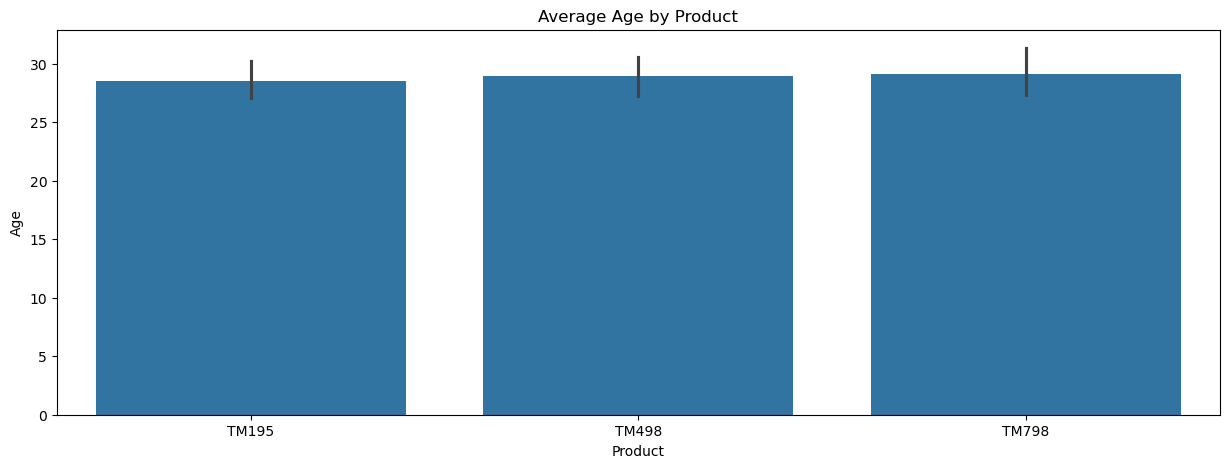

In [31]:
#  Average Age by Product
plt.figure(figsize=(15, 5))
sns.barplot(x='Product', y='Age', data=df)
plt.title('Average Age by Product')
plt.show()

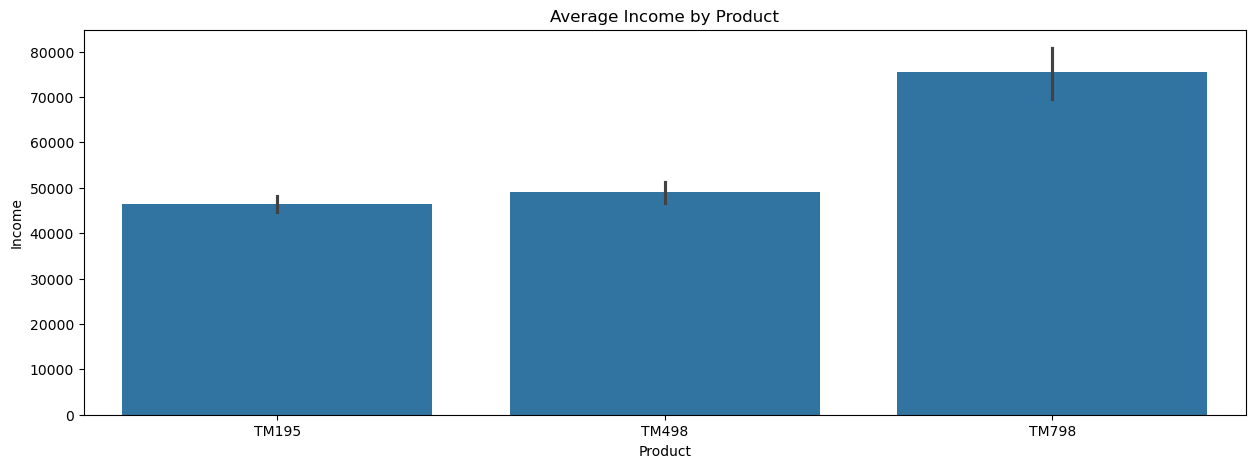

In [35]:
#  Average Income by Product
plt.figure(figsize=(15, 5))
sns.barplot(x='Product', y='Income', data=df)
plt.title('Average Income by Product')
plt.show()

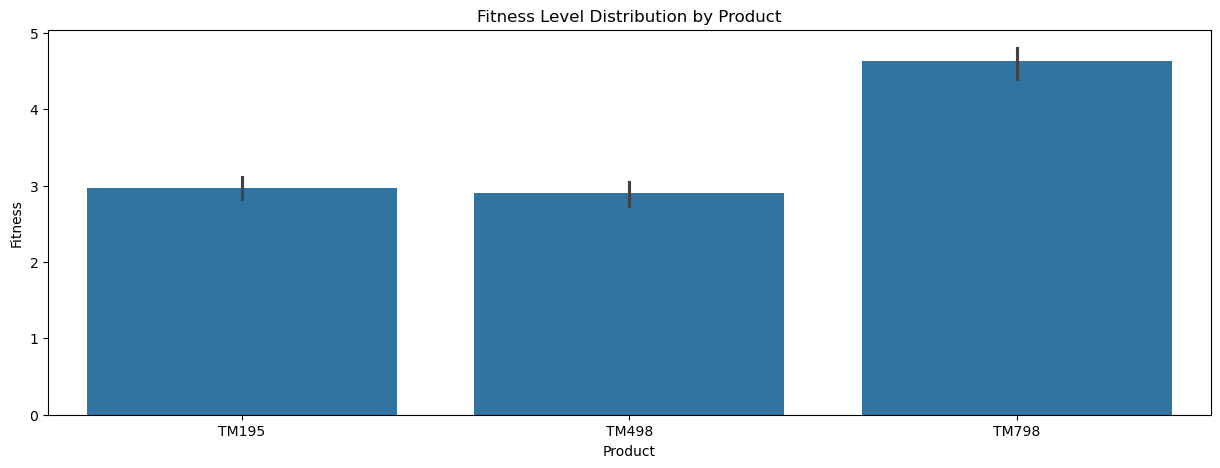

In [77]:
plt.figure(figsize=(15, 5))
sns.barplot(x='Product', y='Fitness', data=df)
plt.title('Fitness Level Distribution by Product')
plt.show()

## 2. Usage Patterns

In [79]:
def usage_patterns(df):
    usage = df.groupby('Product').agg({
        'Usage': 'mean',
        'Miles': 'mean'
    }).reset_index()
    return usage

usage_data = usage_patterns(df)
print(usage_data)

  Product     Usage       Miles
0   TM195  3.087500   82.787500
1   TM498  3.066667   87.933333
2   TM798  4.775000  166.900000


C:\Users\AYAN\AppData\Local\Temp\ipykernel_8896\1093089790.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=usage_data, y='Product', x='Usage', palette='Set2')


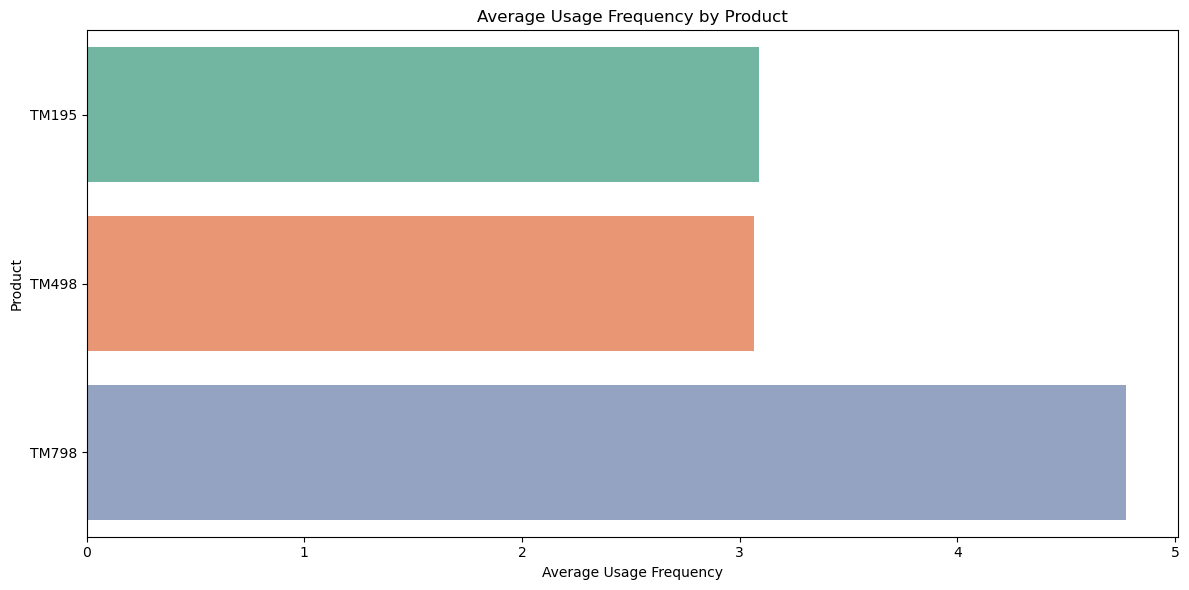

In [82]:
plt.figure(figsize=(12, 6))
sns.barplot(data=usage_data, y='Product', x='Usage', palette='Set2')
plt.title('Average Usage Frequency by Product')
plt.xlabel('Average Usage Frequency')
plt.ylabel('Product')
plt.tight_layout()
plt.show()

## 3. Fitness and Lifestyle Insights

   Fitness Most_Common_Product
0        1               TM195
1        2               TM195
2        3               TM195
3        4               TM195
4        5               TM798


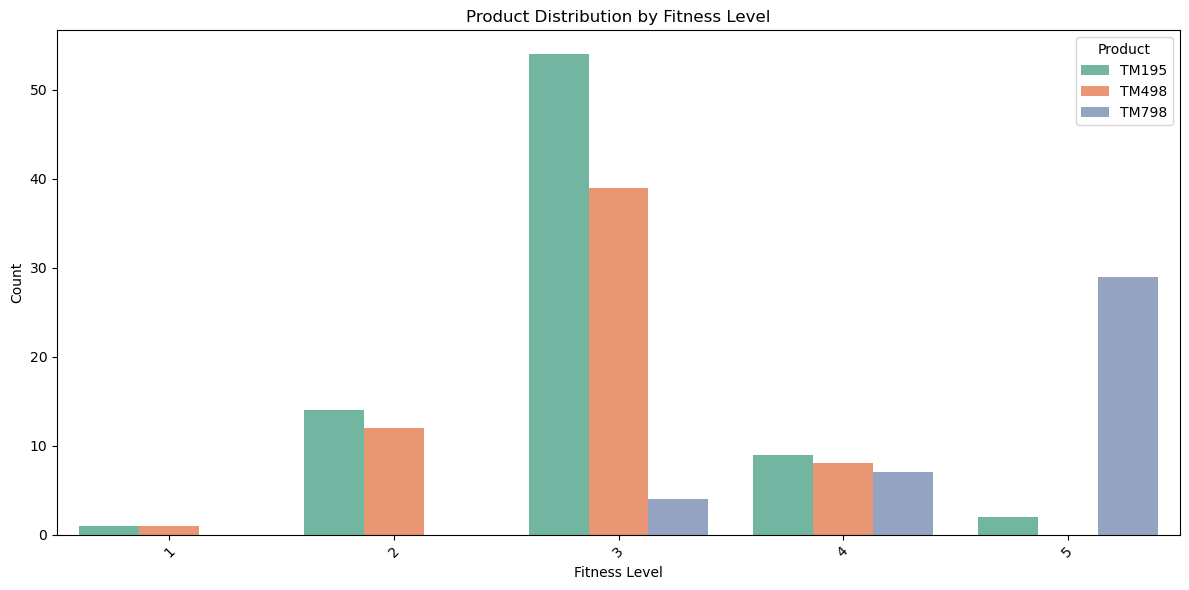

In [85]:
def fitness_correlation(df):
    correlation = df.groupby('Fitness')['Product'].agg(lambda x: x.value_counts().index[0]).reset_index()
    correlation.columns = ['Fitness', 'Most_Common_Product']
    return correlation

fitness_insights = fitness_correlation(df)
print(fitness_insights)


# Visualization
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='Fitness', hue='Product', palette='Set2')
plt.title('Product Distribution by Fitness Level')
plt.xlabel('Fitness Level')
plt.ylabel('Count')
plt.legend(title='Product', loc='upper right')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## 4. Income and Pricing Strategy

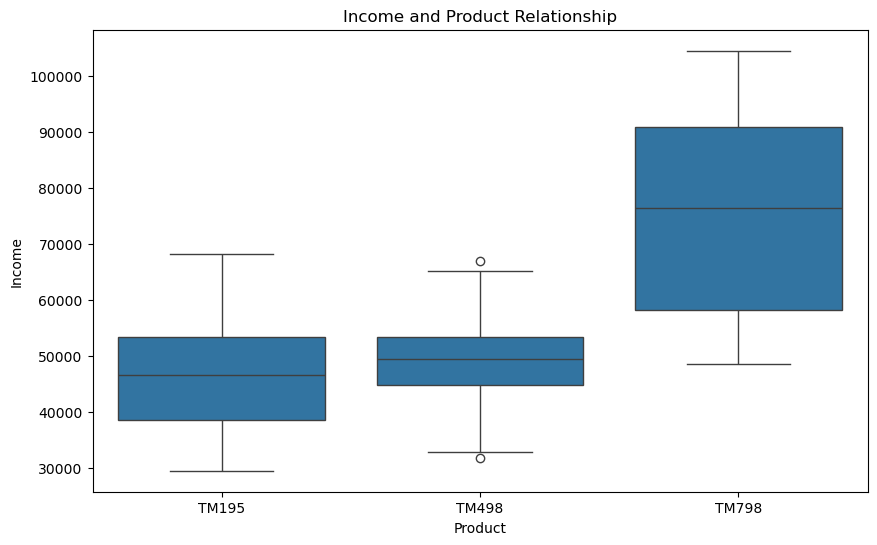

In [87]:
# 7. Income and Pricing Strategy
# Explore the relationship between Income and the Product purchased
plt.figure(figsize=(10, 6))
sns.boxplot(x='Product', y='Income', data=df)
plt.title('Income and Product Relationship')
plt.show()

## 5. Targeting New Customers

In [93]:
data = pd.DataFrame({
    'Age': [25, 30, 35, 40, 45, 50, 55, 60],
    'Gender': ['Male', 'Female', 'Female', 'Male', 'Male', 'Female', 'Male', 'Female'],
    'Income': [30000, 40000, 50000, 60000, 70000, 80000, 90000, 100000],
    'Product': ['TM195', 'TM498', 'TM195', 'TM498', 'TM195', 'TM498', 'TM195', 'TM498'],
    'Fitness': ['Beginner', 'Intermediate', 'Advanced', 'Beginner', 'Advanced', 'Intermediate', 'Beginner', 'Advanced']
})


In [95]:
def target_segments(data):
    target = data.groupby('Product').agg({
        'Age': 'mean',
        'Income': 'mean',
        'Fitness': lambda x: x.value_counts().index[0],
        'Gender': lambda x: x.value_counts().index[0]
    }).reset_index()
    return target

targeting_data = target_segments(data)
print(targeting_data)

  Product   Age   Income       Fitness  Gender
0   TM195  40.0  60000.0      Beginner    Male
1   TM498  45.0  70000.0  Intermediate  Female
